In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

# %load_ext autoreload
# %autoreload 2

In [2]:
DATA = 1
PT = True
if PT: 
    from pre_train2 import *
else:
    from main5 import * 
X_train, Y_train = load_data(DATA)

In [26]:
tf.reset_default_graph()
if PT: 
    Y_train_ = np.stack([Y_train.squeeze()]*3,axis=3)
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 245, 437, 3])
    Y = tf.placeholder(tf.float32, [None, 245, 437, 1])
is_training = tf.placeholder(tf.bool)
output = DACNet(X,is_training,DATA)
loss = tf.nn.l2_loss(output-Y)
mean_loss = tf.reduce_mean(loss)

In [27]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
saver = tf.train.Saver()
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    saver.restore(sess, './Models/PT_data_1_epochs_5_batchsize_15_rate_0.001_decay_1.0')
if DATA == 0:
    saver.restore(sess, './Models/PT_data_0_epochs_20_batchsize_5_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./Models/PT_data_1_epochs_5_batchsize_15_rate_0.001_decay_1.0


In [30]:
for var in tf.global_variables():
    print(var)
    print(var.eval(session=sess))

<tf.Variable 'c1/kernel:0' shape=(2, 2, 3, 32) dtype=float32_ref>
[[[[  8.68624076e-02   4.84162122e-02   4.46461840e-03  -1.41305164e-01
      4.33638208e-02  -1.29596693e-02   3.61823589e-02   7.49892695e-03
     -1.54163614e-01  -3.83020291e-04  -1.24445140e-01   6.51370734e-02
      1.25775650e-01  -2.95488704e-02   7.14737773e-02  -1.72256202e-01
     -1.59738019e-01  -9.62012112e-02   3.57348025e-02  -5.26604913e-02
      1.69001147e-01  -9.37073678e-02  -2.47545108e-01   1.54575258e-01
      2.41402313e-01   4.42359820e-02  -1.47965491e-01  -4.70990874e-03
     -1.09581864e-02   1.04921088e-01  -9.92824882e-02  -2.51187325e-01]
   [ -4.74579670e-02  -3.81502882e-02  -1.05870917e-01  -2.40574643e-01
      1.05678134e-01   2.03034863e-01   1.28072202e-02   5.40227583e-03
      1.94062874e-01  -1.77244663e-01   3.77051681e-02   4.85179201e-03
      6.38470054e-02  -8.94835312e-03   1.32720381e-01  -1.22924216e-01
     -1.13161549e-01  -1.12956338e-01   9.83895436e-02  -1.30447760e-

4151.19


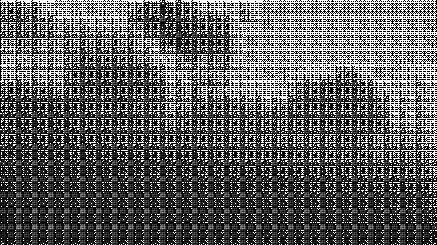

In [30]:
i = 2
IMG, img_loss, m_loss = sess.run([output, loss, mean_loss], {X: Y_train_[i:i+1,...],
                                              Y: Y_train[i:i+1,...],
                                                 is_training: False})
print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG*255.0)))

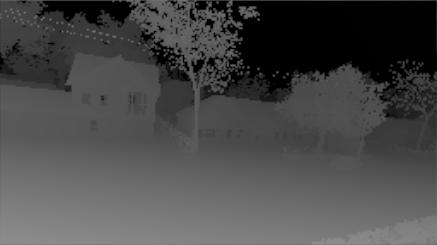

In [12]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

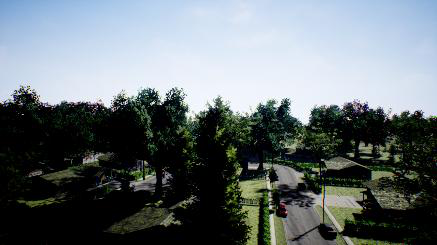

In [16]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))

In [37]:
IMG.squeeze()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [19]:
np.amax(IMG)

0.28083199